# Validate Final Datasets
Data created in `2021-05-create-final-analysis-data.py`, along the lines defined by the pre-registered experiment plan: [The Role of Institutional Experience in Volunteering and Donating](https://osf.io/f2xwr/).


In [7]:
library(ggplot2)
library(gmodels)
library(MASS)
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

data_folder <- "/local/Shared/lab-of-ornithology-data/2021-05-14-final-data"

In [59]:
participant.email <- read.csv(file.path(data_folder, "participant_emails-2021-05-13.csv"))
participant.email$TREAT <- as.integer(participant.email$TREAT)
participant.email$app.usage <- as.integer(participant.email$app.usage)

In [12]:
CrossTable(participant.email$email.type, participant.email$TREAT,
           prop.t=0, prop.chisq=0, prop.r=0, prop.c=0)


 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  80000 

 
                             | participant.email$TREAT 
participant.email$email.type |         0 |         1 | Row Total | 
-----------------------------|-----------|-----------|-----------|
                      donate |     20000 |     20000 |     40000 | 
-----------------------------|-----------|-----------|-----------|
                   volunteer |     20000 |     20000 |     40000 | 
-----------------------------|-----------|-----------|-----------|
                Column Total |     40000 |     40000 |     80000 | 
-----------------------------|-----------|-----------|-----------|

 


In [13]:
colnames(participant.email)

[1] "anon_id"                "sent"                   "delivered"             
 [4] "opened"                 "link.clicked"           "email.type"            
 [7] "email.open.rate.before" "TREAT"                  "app.usage"             
[10] "state"                  "created"                "TREpAT"

# Example Analysis and plot
Estimate the effect of being assigned to treatment on the probability of clicking on a link in an email, for the volunteering email. And estimate whether the effect is different for participants who have already use the apps already.

In [15]:
summary(volunteer.click.m1 <- lm(link.clicked ~ TREAT + app.usage + TREAT:app.usage, subset(participant.email, email.type=="volunteer")))


Call:
lm(formula = link.clicked ~ TREAT + app.usage + TREAT:app.usage, 
    data = subset(participant.email, email.type == "volunteer"))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.0185 -0.0122 -0.0087 -0.0061  0.9939 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.008700   0.001059   8.212 2.25e-16 ***
TREAT           -0.002600   0.001498  -1.735   0.0827 .  
app.usage        0.009800   0.001498   6.541 6.20e-11 ***
TREAT:app.usage -0.003700   0.002119  -1.746   0.0808 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1059 on 39996 degrees of freedom
Multiple R-squared:  0.001921,	Adjusted R-squared:  0.001846 
F-statistic: 25.66 on 3 and 39996 DF,  p-value: < 2.2e-16


### Interpret Results

### Create Chart

In [16]:
sim.results.volunteer.click <- data.frame(TREAT     = c(0,1,0,1),
                                          app.usage = c(0,0,1,1), 
                                          label     = c("ctl no app", "treat no app",
                                                        "ctl app",    "treat app"))

sim.results.volunteer.click <- cbind(sim.results.volunteer.click, predict(volunteer.click.m1, sim.results.volunteer.click, interval = "confidence"))
sim.results.volunteer.click

,TREAT,app.usage,label,fit,lwr,upr
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,0,0,ctl no app,0.0087,0.006623381,0.010776619
2,1,0,treat no app,0.0061,0.004023381,0.008176619
3,0,1,ctl app,0.0185,0.016423381,0.020576619
4,1,1,treat app,0.0122,0.010123381,0.014276619


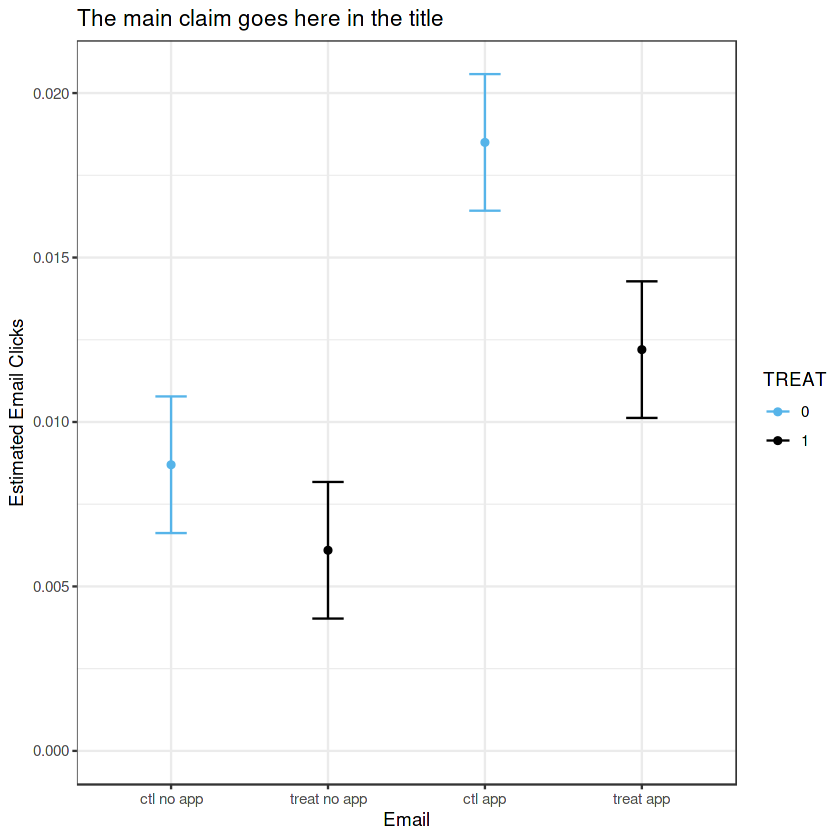

In [17]:
sim.results.volunteer.click$label <- factor(sim.results.volunteer.click$label,
                                            levels =c("ctl no app", "treat no app",
                                                        "ctl app",    "treat app"))

ggplot(sim.results.volunteer.click, aes(label, fit,color=factor(TREAT))) +
    geom_point() +
    geom_errorbar(ymin=sim.results.volunteer.click$lwr,
                  ymax=sim.results.volunteer.click$upr, width=0.2) +
    ylim(0,
         max(sim.results.volunteer.click$upr)) +
    scale_color_manual(values=c(cbbPalette[3], cbbPalette[1])) +
    labs(y="Estimated Email Clicks", x="Email", col="TREAT") +
    theme_bw() +
    ggtitle("The main claim goes here in the title")

# Analyze Study Participant Data
Example analysis: the effect of receiving the intervention on whether someone was based in Indiana after the study.

In [60]:
participants <- read.csv(file.path(data_folder, "participants-2021-05-13.csv"))
participants$TREAT <- as.integer(participants$TREAT)
participants$app.usage <- as.integer(participants$app.usage)

colnames(participants)

[1] "anon_id"                "TREAT"                  "app.usage"             
 [4] "emails.sent"            "emails.delivered"       "emails.opened"         
 [7] "emails.clicked"         "email.open.rate.before" "volunteering_any"      
[10] "ebird_num_interactions" "donation_any"           "donation_amount"       
[13] "single_recurring"       "state"                  "created"

In [61]:
CrossTable(participants$app.usage, participants$TREAT,
           prop.t=0, prop.chisq=0, prop.r=0, prop.c=0)


 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  40000 

 
                       | participants$TREAT 
participants$app.usage |         0 |         1 | Row Total | 
-----------------------|-----------|-----------|-----------|
                     0 |     10000 |     10000 |     20000 | 
-----------------------|-----------|-----------|-----------|
                     1 |     10000 |     10000 |     20000 | 
-----------------------|-----------|-----------|-----------|
          Column Total |     20000 |     20000 |     40000 | 
-----------------------|-----------|-----------|-----------|

 


In [62]:
summary(sim.results.indiana.m1 <- lm(state=="in" ~ TREAT + app.usage + TREAT:app.usage, data=participants))


Call:
lm(formula = state == "in" ~ TREAT + app.usage + TREAT:app.usage, 
    data = participants)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.0138 -0.0092 -0.0083 -0.0078  0.9922 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.0078000  0.0009836   7.930 2.25e-15 ***
TREAT            0.0005000  0.0013910   0.359  0.71926    
app.usage        0.0060000  0.0013910   4.313 1.61e-05 ***
TREAT:app.usage -0.0051000  0.0019672  -2.593  0.00953 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09836 on 39996 degrees of freedom
Multiple R-squared:  0.0005839,	Adjusted R-squared:  0.0005089 
F-statistic: 7.789 on 3 and 39996 DF,  p-value: 3.396e-05


### Interpret Results and Create Chart

In [63]:
sim.results.indiana <- data.frame(TREAT     = c(0,1,0,1),
                                  app.usage = c(0,0,1,1), 
                                  label     = c("ctl no app", "treat no app",
                                                "ctl app",    "treat app"))

sim.results.indiana <- cbind(sim.results.indiana, predict(sim.results.indiana.m1, sim.results.indiana, interval = "confidence"))
sim.results.indiana

,TREAT,app.usage,label,fit,lwr,upr
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,0,0,ctl no app,0.0078,0.005872114,0.009727886
2,1,0,treat no app,0.0083,0.006372114,0.010227886
3,0,1,ctl app,0.0138,0.011872114,0.015727886
4,1,1,treat app,0.0092,0.007272114,0.011127886


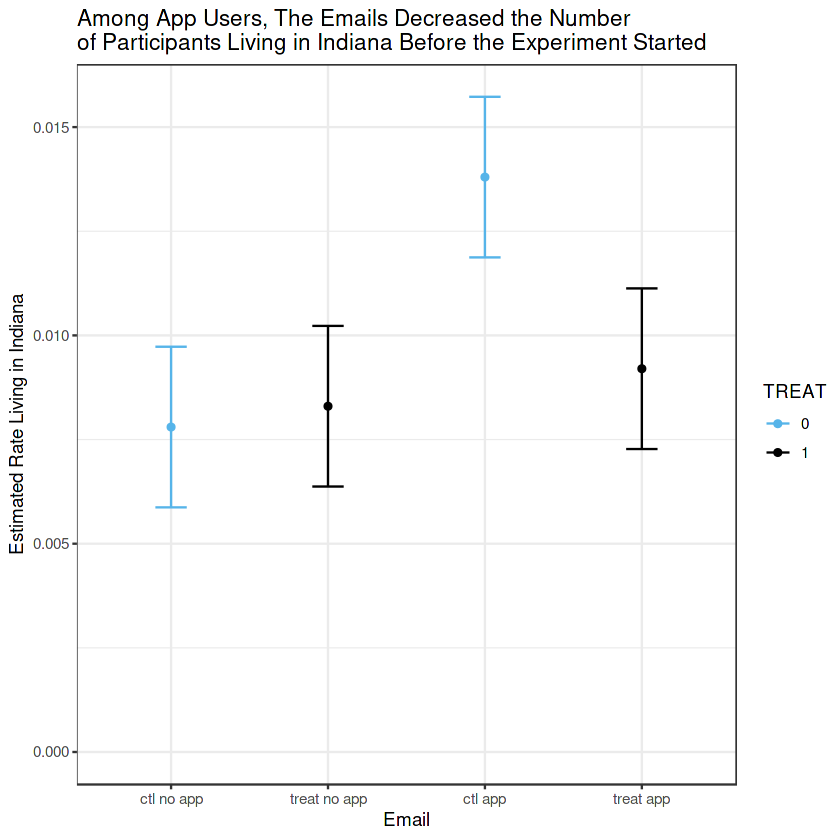

In [67]:
sim.results.indiana$label <- factor(sim.results.indiana$label,
                                    levels =c("ctl no app", "treat no app",
                                              "ctl app",    "treat app"))

ggplot(sim.results.indiana, aes(label, fit,color=factor(TREAT))) +
    geom_point() +
    geom_errorbar(ymin=sim.results.indiana$lwr,
                  ymax=sim.results.indiana$upr, width=0.2) +
    ylim(0,
         max(sim.results.indiana$upr)) +
    scale_color_manual(values=c(cbbPalette[3], cbbPalette[1])) +
    labs(y="Estimated Rate Living in Indiana", x="Email", col="TREAT") +
    theme_bw() +
    ggtitle("Among App Users, The Emails Decreased the Number\nof Participants Living in Indiana Before the Experiment Started")